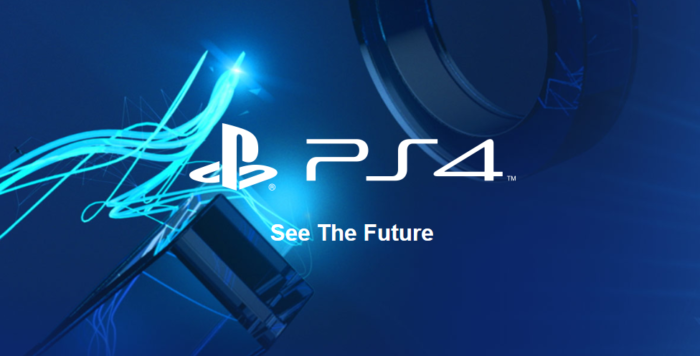
<h1><center>PS4 Games Analysis</center></h1>

### Phase 1 : Business Understanding ###

To study and understand the past sales of PS4 games in order to come out with answers to these questions : 

- [ ] Publisher
  > Question 1 : Which publisher have publish most games for PS4 (based on genre) ?
  > 
  > Question 2 : What is the ranking for the publisher (based on total sales) ?
- [ ] Sales
  > Question 3 : Which PS4 game's genre score the highest sales ? And during which sales its selling like hot cakes ?
  > 
- [ ] Games
  > Question 4 : Which genre game has been released the most in a single year?

In [1]:
# Import all required library and start reading csv file
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from natsort import index_natsorted
import pandas_profiling as pp
%matplotlib inline

# You can type pd. and press tab to see available dataframe command
# To have more information about the command, press Shift + Tab button
df = pd.read_csv('./PS4_GamesSales.csv', encoding = "ISO-8859-1")

# show head of the data
df.head()

Game    Year             Genre       Publisher  \
0         Grand Theft Auto V  2014.0            Action  Rockstar Games   
1  Call of Duty: Black Ops 3  2015.0           Shooter      Activision   
2      Red Dead Redemption 2  2018.0  Action-Adventure  Rockstar Games   
3         Call of Duty: WWII  2017.0           Shooter      Activision   
4                    FIFA 18  2017.0            Sports       EA Sports   

   North America  Europe  Japan  Rest of World  Global  
0           6.06    9.71   0.60           3.02   19.39  
1           6.18    6.05   0.41           2.44   15.09  
2           5.26    6.21   0.21           2.26   13.94  
3           4.67    6.21   0.40           2.12   13.40  
4           1.27    8.64   0.15           1.73   11.80

### Phase 2 : Data Understanding ###

#### To provide basic information on data set so that we can gain insights of what this data set is all about. Understanding the data is important in order to proceed to processing it to provide useful information

In [2]:
print("Data Set Information\n")

# print number of columns and rows
print( "1. This dataset consists of", len(df),  "rows and", len(df.columns), "columns\n")

# find the column with no null value - null value == 0
no_nulls = set(df.columns[df.isnull().mean()==0])
print("2. Number of column with complete value :", no_nulls, "\n")

# list out all of the column name
print("3. Column names are :", list(df.columns), "\n")

# The total number of elements of dataframe is equal to the row_count * column_count
print("4. This dataset consists of", df.size, "elements\n")

# How many publishers recorded in this dataset
print("5. Total number of publisher recorded is:", df['Publisher'].nunique(), "publishers\n")

# How many game's genre available in this dataset
print("6. Total genre for PS4 games in this dataset is:", df['Genre'].nunique(), "\n")


Data Set Information

1. This dataset consists of 1034 rows and 9 columns

2. Number of column with complete value : {'Game', 'North America', 'Global', 'Rest of World', 'Europe', 'Japan', 'Genre'} 

3. Column names are : ['Game', 'Year', 'Genre', 'Publisher', 'North America', 'Europe', 'Japan', 'Rest of World', 'Global'] 

4. This dataset consists of 9306 elements

5. Total number of publisher recorded is: 152 publishers

6. Total genre for PS4 games in this dataset is: 17 



In [3]:
# Use ProfileReport() to generate a report on the input DataFrame.

profile = pp.ProfileReport(df, title='PS4 Games Profile Report')

profile

### Phase 3 : Data Preparation / Data Processing

#### 1. Rename few columns to make the data more understandable.

#### 2. Remove the rows associated with nan values in Publisher column. When the Publisher value is null, the row data is not meaningful to use for this project.

In [4]:
# rename few columns to make the data more understandable
df.rename(
    columns=({ 'North America': 'NA Sales', 'Europe': 'Eu Sales', 'Japan': 'Jp Sales', 'Rest of World': 'Others Sales', 'Global': 'Total Sales'}), 
    inplace=True,
)

df.head()

# drop all row with null value for Publisher column
df = df.dropna(subset=['Publisher'])

# check if any null value in Publisher column
df['Publisher'].isnull().values.any()

False

### Phase 4: Visualization of Data

#### Data visualization  gives us a clear idea of what the information means by giving it visual context through graphs. This makes easier to identify trends and patterns within data sets, and also to answer the questions asked.

Question 1 : Which publisher have publish most games for PS4 (based on genre) ?

Namco Bandai Games                56
Sony Interactive Entertainment    47
Ubisoft                           45
Square Enix                       40
Tecmo Koei                        37
Name: Publisher, dtype: int64


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Namco Bandai Games'),
  Text(1, 0, 'Sony Interactive Entertainment'),
  Text(2, 0, 'Ubisoft'),
  Text(3, 0, 'Square Enix'),
  Text(4, 0, 'Tecmo Koei')])

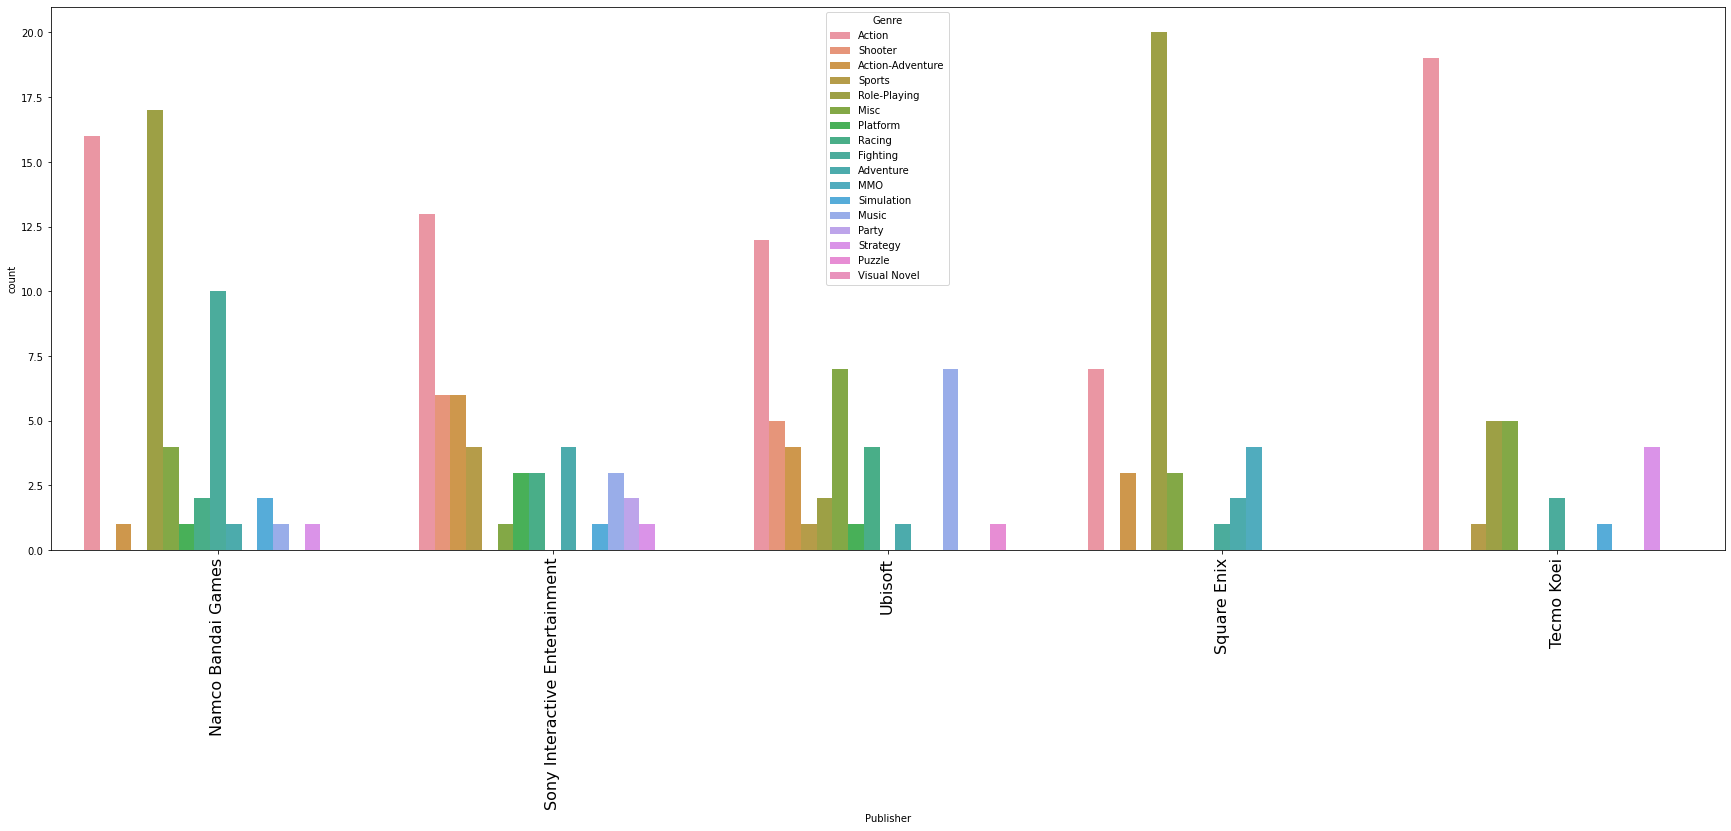

In [5]:
# I use function to return highest value count in Publisher column to get the answer for the first question.
# This function also reusable to return other column highest value, not just for Publisher column

def high_value(x, y):
    """This function returns high count of dataframe column value based on input of column name and 
    number of unique value input by user
    INPUT :- Publisher string input as x, while number of highest count as y
    OUTPUT :- List of column value with highest count, depends on number of unique value user wants to output"""
    highest_count = x.value_counts()
    return highest_count[:y]

print(high_value(df.Publisher, 5))

# Publisher - Question 1 : Which publisher have publish most games for PS4 (based on genre) ?
plt.figure(figsize=(30, 10))
sns.countplot(x="Publisher", data=df, hue='Genre', order=df.Publisher.value_counts().iloc[:5].index)
plt.xticks(size=16, rotation=90)

Question 2 : What is the ranking for the publisher (based on total sales) ?

Publisher
Activision                        72.44
Ubisoft                           59.16
Electronic Arts                   54.96
Sony Interactive Entertainment    54.85
EA Sports                         47.55
Name: Total Sales, dtype: float64


(array([ 0., 10., 20., 30., 40., 50., 60., 70., 80.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

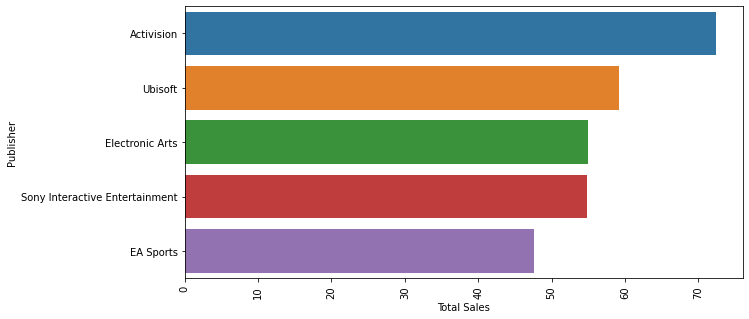

In [6]:
# calculate the Publisher earnings using groupby method
top_earn_publisher = df.groupby('Publisher')['Total Sales'].sum()
# find the top 5 publisher with highest earnings using nlargest method
status = top_earn_publisher.nlargest(5)

print (status)

# Plot graph for better visualization
data_genre = df.groupby(by=['Publisher'])['Total Sales'].sum()
data_genre = data_genre.reset_index()
data_genre = data_genre.sort_values(by=['Total Sales'], ascending=False)
# data_genre

plt.figure(figsize=(10, 5))
sns.barplot(x="Total Sales", y="Publisher", data=data_genre[:5])
plt.xticks(rotation=90)

## Sales
Question 3 : Which PS4 game's genre published the most ? And during which sales its selling like hot cakes ?

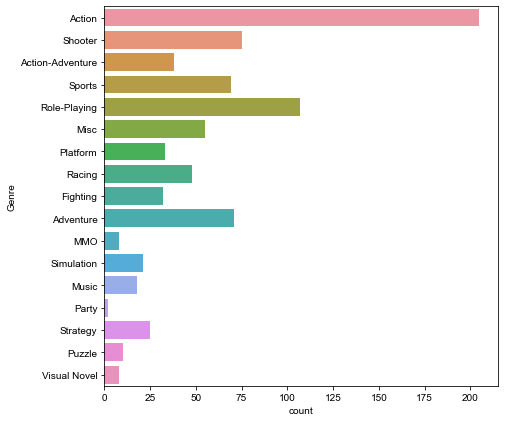

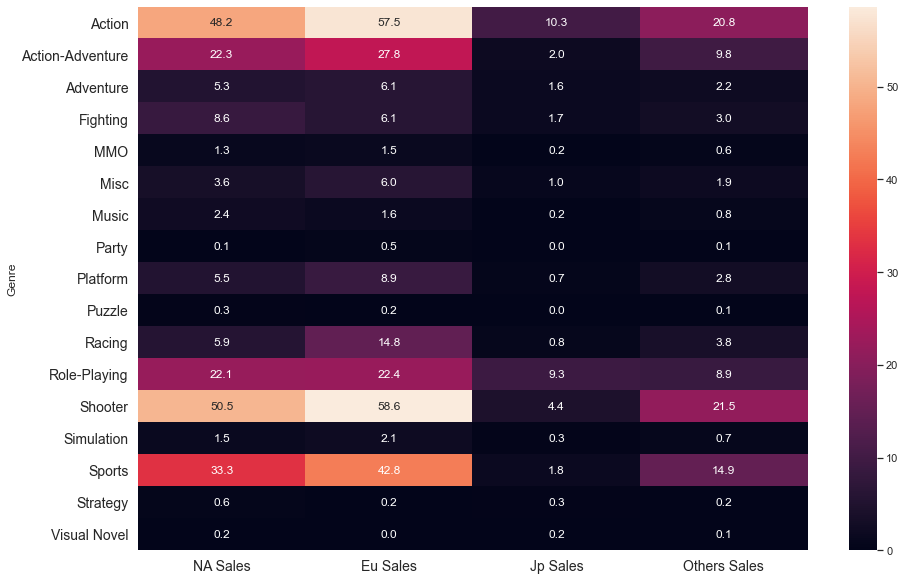

In [7]:
# Visualization of data to answer the question :
plt.figure(figsize=(20,6))
plt.subplot(133)
sns.countplot(data=df, y='Genre')
plt.tight_layout()

comp_genre = df[['Genre', 'NA Sales', 'Eu Sales', 'Jp Sales', 'Others Sales']]
# comp_genre
comp_map = comp_genre.groupby(by=['Genre']).sum()
# comp_map
plt.figure(figsize=(15, 10))
sns.set(font_scale=1)
sns.heatmap(comp_map, annot=True, fmt = '.1f')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

## Games

Question 4 : Which genre game has been released the most in a single year?

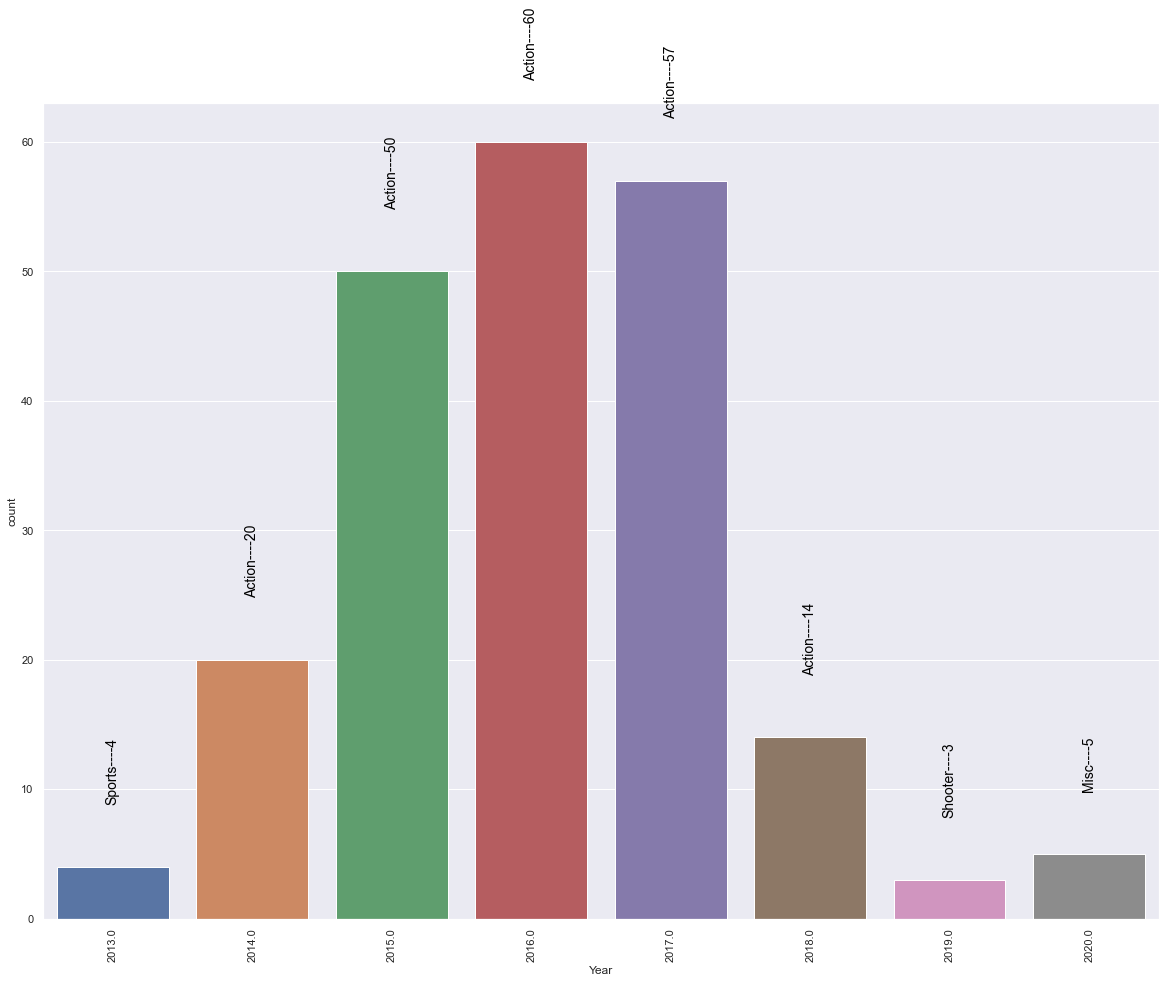

In [8]:
year_max_df = df.groupby(['Year', 'Genre']).size().reset_index(name='count')
year_max_idx = year_max_df.groupby(['Year'])['count'].transform(max) == year_max_df['count']
year_max_genre = year_max_df[year_max_idx].reset_index(drop=True)
year_max_genre = year_max_genre.drop_duplicates(subset=["Year", "count"], keep='last').reset_index(drop=True)

genre = year_max_genre['Genre'].values

plt.figure(figsize=(20, 15))
g = sns.barplot(x='Year', y='count', data=year_max_genre)
index = 0
for value in year_max_genre['count'].values:
#     print(asd)
    g.text(index, value + 5, str(genre[index] + '----' +str(value)), color='#000', size=14, rotation= 90, ha="center")
    index += 1

plt.xticks(rotation=90)
plt.show()